# Version 1

### Numpy 4.9 (20 min)
Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

! curl -L -o populations.txt https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt


In [1]:
! curl -O -L https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   123  100   123    0     0    402      0 --:--:-- --:--:-- --:--:--   401
100    17  100    17    0     0     23      0 --:--:-- --:--:-- --:--:--    23
100   525  100   525    0     0    441      0  0:00:01  0:00:01 --:--:--     0


mean populations:  [34080.95238095 20166.66666667 42400.        ] 

[[ 4.58558619e+08  2.56418333e+07 -1.21050000e+06]
 [ 2.56418333e+07  2.77422333e+08 -3.85930000e+07]
 [-1.21050000e+06 -3.85930000e+07  1.15910000e+07]] 

[4.58558619e+08 2.77422333e+08 1.15910000e+07] 

[[ 1.          0.07189206 -0.01660378]
 [ 0.07189206  1.         -0.68057717]
 [-0.01660378 -0.68057717  1.        ]] 

['carrots', 'carrots', 'hares', 'hares', 'lynxes', 'lynxes', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots', 'hares', 'hares', 'hares', 'lynxes', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots']


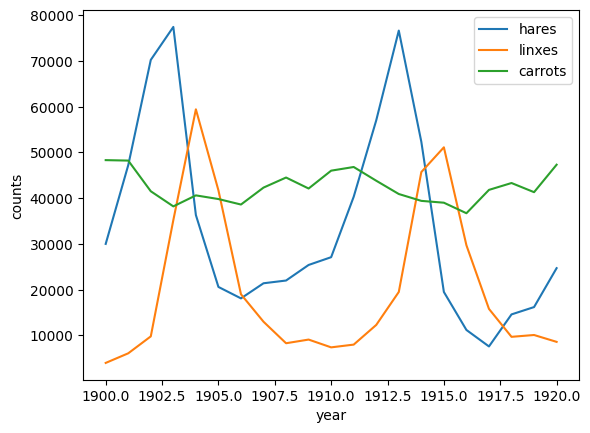

In [19]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("populations.txt")
year = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

#plt.figure()
plt.plot(year, hares, label="hares")
plt.plot(year, lynxes, label="linxes")
plt.plot(year, carrots, label="carrots")
plt.xlabel("year")
plt.ylabel("counts")
plt.legend()

mean = np.mean(data[:, 1:], axis= 0)
print("mean populations: ", mean, "\n")
cov = np.cov(data[:, 1:].T, ddof= 1) #unbiased sample variance N-1
print(cov, "\n")
stds = np.std(data[:, 1:], axis= 0, ddof= 1)  #unbiased sample variance N-1
print(stds**2, "\n") # same as the diagonal entries of cov

# Correlation coefficients
rho = np.corrcoef(data[:, 1:].T)
print(rho, "\n")

# Highest population each year
species_names= ["hares", "lynxes", "carrots"]
species = [species_names[np.argmax(data[year_idx, 1:])] for year_idx in range(data.shape[0])]
print(species)

**Answer to question**  from the graph there seems to be a correlation between hares and lynxes. Hares population oscillates and linxes population follows the same oscillatory pattern with a delay of 3 years more or less.

### Bash 3.1 (20 min)
1\.a Make a new directory called `students` in your home. Download a csv file with the list of students of this lab from [here](https://www.dropbox.com/s/867rtx3az6e9gm8/LCP_22-23_students.csv) (use the `wget` command) and copy that to `students`. First check whether the file is already there

**1\.b** Make two new files, one containing the students belonging to PoD, the other to Physics.

**1\.c** For each letter of the alphabet, count the number of students whose surname starts with that letter. 

**1\.d** Find out which is the letter with most counts.

**1\.e** Assume an obvious numbering of the students in the file (first line is 1, second line is 2, etc.), group students "modulo 18", i.e. 1,19,37,.. 2,20,38,.. etc. and put each group in a separate file  

```bash

# 1.a
mkdir students
curl -L -O "https://www.dropbox.com/scl/fi/bxv17nrbrl83vw6qrkiu9/LCP_22-23_students.csv?rlkey=47fakvatrtif3q3qw4q97p5b7&e=1" 
cd students
ls 
cp ../LCP_22-23_students.csv ./LCP_22-23_students.csv

# 1.b
head -n 1 LCP_22-23_students.csv > pod_students.csv # creates files and prints header inside
head -n 1 LCP_22-23_students.csv > physics_students.csv
grep "PoD" LCP_22-23_students.csv >> pod_students.csv # >> appends, > overwrites
grep "Physics" LCP_22-23_students.csv >> physics_students.csv

# 1.c, 1.d

# chmod +x my_script.sh
# ./my_script.sh
max_counts_letter=A
max_counts=$(grep -c "^$max_counts_letter" LCP_22-23_students.csv) # ^ = starting with
for letter in {A..Z}; do
    counts=$(grep -c "^$letter" LCP_22-23_students.csv)
    echo "$letter, $counts"
    if [ $counts -gt $max_counts ]; then
        max_counts=$counts # careful do NOT add spaces!
        max_counts_letter=$letter
    fi
done
echo "done."
echo "The letter with max counts is $max_counts_letter with $max_counts"

# 1.e
for (( i=0; i<18; i++ )); do
    head -n 1 "LCP_22-23_students.csv" > "${i}_mod_18_students.csv" # use {}
done
index=0 #skip the first line, which is the header
while IFS= read -r line; do
    if [ $index -gt 0 ]; then
        module=$(( index % 18 ))
        echo "$line" >> "${module}_mod_18_students.csv" #>> append, use {}
    fi
    (( index++ )) # dont use $
done < LCP_22-23_students.csv # specify where to read from
```

### Visualization 7.1\. Kernel Density Estimate (done)

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of length **N** (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation **$\sigma$**.
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and the std as a parameter that can be tuned. The std default value should be:
$$ \alpha * \sigma * N ^{-\frac{1}{5.}} $$

The KDE is a procedure used to smooth the histogram. The parameter $\alpha$ tunes the bandwidth of the individual gaussians:
- if choosen too small, data artifacts will remain visible (the underlying distribution is under-smoothed)
- if choosen too large, the real pdf will be obscured.

Start from a value of $\alpha = 1.06$ and then tune.


you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


95.47327120351747 71.04577298146069


Text(0, 0.5, 'counts')

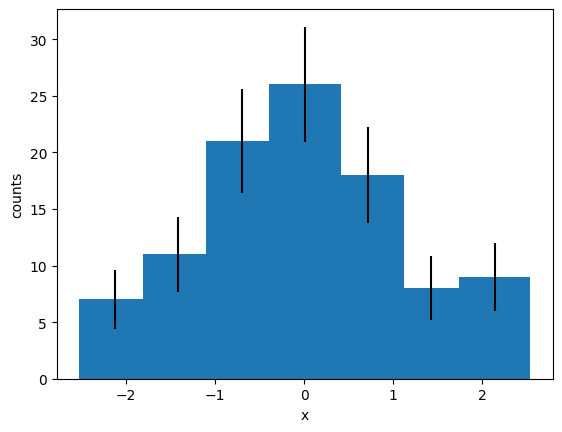

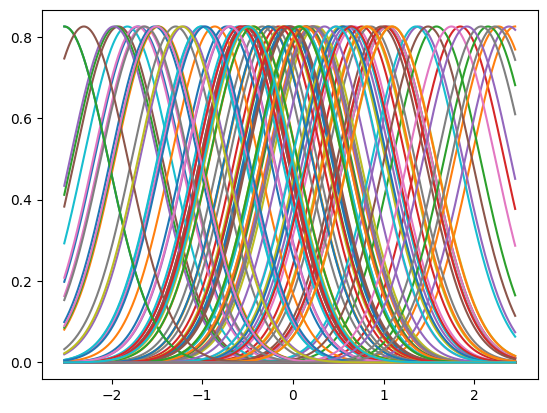

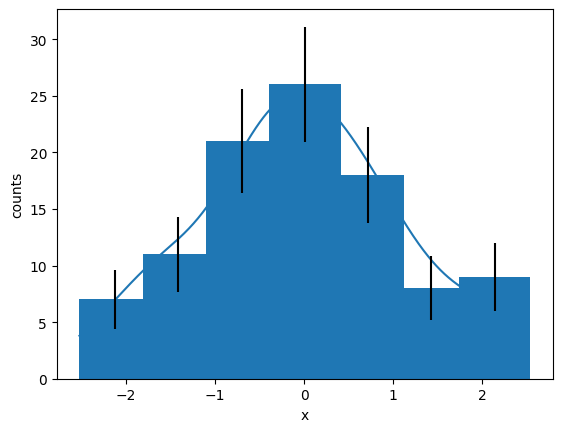

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapezoid

# Visualization
N = 100
nbins = 7
x = norm.rvs(loc=0, scale=1, size=N)
counts, bin_edges = np.histogram(x, bins = nbins)
deltax = bin_edges[1]-bin_edges[0]
errors = np.sqrt(counts)
plt.bar(x= bin_edges[:-1], height=counts, yerr=errors, align = "edge" )
plt.xlabel("x")
plt.ylabel("counts")

# KDE
alpha =1.06
kernel_std = alpha * np.std(x) * (x.size) ** (-1./5.)
bin_centers = bin_edges[:-1] + deltax
x_smooth = np.linspace(bin_edges[0], bin_edges[-1], 1000)
gaussians = np.array([ norm.pdf(x_smooth, loc = xpoint, scale = kernel_std) for xpoint in x ])
summed_gaussian = np.sum(gaussians, axis=0)
integral = trapezoid(y= summed_gaussian, x= x_smooth)
histogram_integral = N * deltax
deltax
print(integral, histogram_integral)

plt.figure()
for i in range(gaussians.shape[0]):
    plt.plot(x_smooth, gaussians[i, :])


plt.figure()
plt.plot(x_smooth, summed_gaussian* (histogram_integral/integral))
plt.bar(x= bin_edges[:-1], height=counts, yerr=errors, align = "edge" )
plt.xlabel("x")
plt.ylabel("counts")

### Algorithms 9.2 
Curve fitting of temperature in Alaska

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

### Montecarlo 10.1

**Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time